In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scope_onset.datasets.gsd_outcome_dataset import get_gsd_outcome_dataset


In [3]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()

In [4]:

label_file_path = '/Users/jk1/OneDrive - unige.ch/stroke_research/geneva_stroke_dataset/clinical_data/multi_annual_joined_data/scope_joined_variables/onset_prediction/with_imaging_curated_completed_joined_anon_outcome_df.xlsx'
imaging_dataset_path = '/Users/jk1/temp/onset_scope_tests/train_noGT_pmaps_15-19_dataset_with_onset_to_imaging.npz'
# main_log_dir = '/Users/jk1/temp/keras_scope_test'
channels = [0, 1, 2, 3]
outcome = "onset_to_imaging"
id_variable = "pid"
model_input_shape = (46, 46, 46)
split_ratio = 0.3
batch_size = 2
train_dataset, validation_dataset, id_allocation = get_gsd_outcome_dataset(label_file_path, imaging_dataset_path,
                                                            outcome, channels,
                                                            model_input_shape, split_ratio, batch_size, id_variable,
                                                            continuous_outcome=1)

Using channels: ['wcoreg_Tmax', 'wcoreg_CBF', 'wcoreg_MTT', 'wcoreg_CBV']


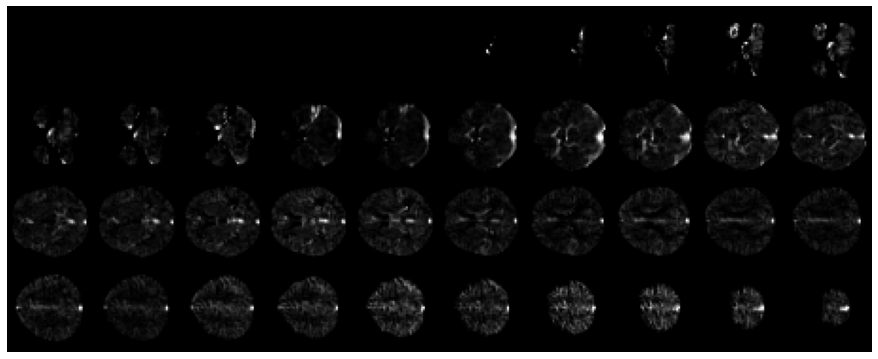

In [5]:
data = train_dataset.take(1)
image_tensors, labels = list(data)[0]
tensor = image_tensors[0]
images = image_tensors.numpy()
image = images[0]
# Visualize montage of slices.
# 4 rows and 10 columns for 100 slices of the CT scan.
plot_slices(4, 10, 46, 46, image[:, :, :40, 3])


histogramShift
scale


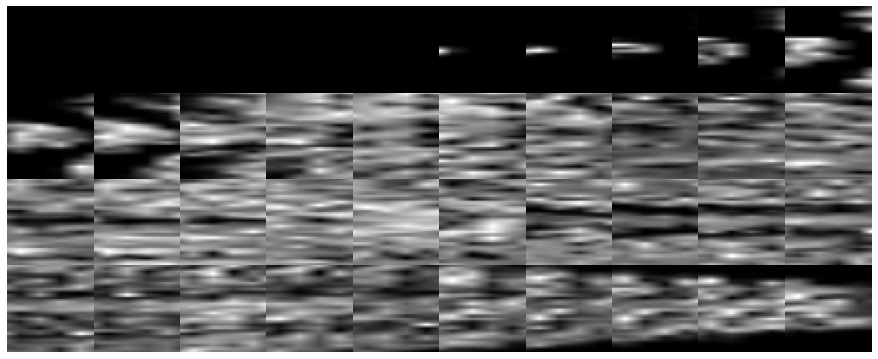

In [6]:
from scope_onset.utils.augmentations import RandAugment3D

transformer = RandAugment3D(2)
trans_img = transformer(tensor)

plot_slices(4, 10, 46, 46, trans_img[:, :, :40, 2])


In [ ]:
vals = image.mean(axis=0).flatten()
trans_vals = trans_img.numpy().mean(axis=0).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals)
b, bins, patches = plt.hist(trans_vals)

In [ ]:
from monai.transforms import RandAffine
from scope_onset.utils.augmentations import to_channels_first, to_channels_last, shear, adjustContrast, equalize, scale


def rotate(volume):
    transformer = RandAffine(prob=1, rotate_range=((30, -30), (10, -10), (10, -10)), padding_mode='border')
    return transformer(volume).numpy()


trans_img = scale(to_channels_first(tensor).numpy())
# trans_img = rotate(to_channels_first(tensor).numpy())
trans_img = rotate(trans_img)
plot_slices(4, 10, 46, 46, trans_img[2,:, :, :40])




In [ ]:

vals = image.mean(axis=0).flatten()
trans_vals = trans_img.mean(axis=0).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals)
b, bins, patches = plt.hist(trans_vals)


